In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

finance_dis_csv = "data_sets/states.csv"
finance_dis_df = pd.read_csv(finance_dis_csv)
c_finance_df = finance_dis_df.dropna(how='any')



c_finance_df.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
51,Alabama,1993,727716.0,2827391,331409,1729295,766687,2833433,1564558,794146,237222.0,204207
52,Alaska,1993,121156.0,1191398,176150,775829,239419,1126398,494917,433788,36291.0,135791
53,Arizona,1993,676297.0,3427976,318465,1415407,1694104,3623946,1578889,1000914,164083.0,680139
54,Arkansas,1993,311432.0,1346909,128196,771079,447634,1376067,782791,386526,68617.0,97824
55,California,1993,5129788.0,28043338,2151157,17064146,8828035,28110986,15281147,8914559,1608514.0,1944760


In [18]:
year_grp = c_finance_df.groupby("YEAR")
totrev_year = c_finance_df.groupby("YEAR").sum()["TOTAL_REVENUE"]
enroll_year = c_finance_df.groupby("YEAR").sum()["ENROLL"]
tot_expend = c_finance_df.groupby("YEAR").sum()["TOTAL_EXPENDITURE"]
avg_enroll_year = c_finance_df.groupby("YEAR").mean()["ENROLL"]
net_income = totrev_year - tot_expend


rev_enroll_df = pd.DataFrame({ 'enroll': enroll_year, 'total revenue': totrev_year, 
                              'total expenditure': tot_expend,'net income': net_income,'average enroll': avg_enroll_year}) 
rev_enroll_df = rev_enroll_df.reset_index(drop=False)
rev_enroll_df.head()

,YEAR,enroll,total revenue,total expenditure,net income,average enroll
0,1993,40904771.0,243206654,244202408,-995754,802054.333333
1,1994,40870582.0,250750573,252664869,-1914296,801383.960784
2,1995,43807625.0,279277709,281831835,-2554126,858973.039216
3,1996,44570461.0,292952786,297740499,-4787713,873930.607843
4,1997,45307367.0,311885259,315861220,-3975961,888379.745098


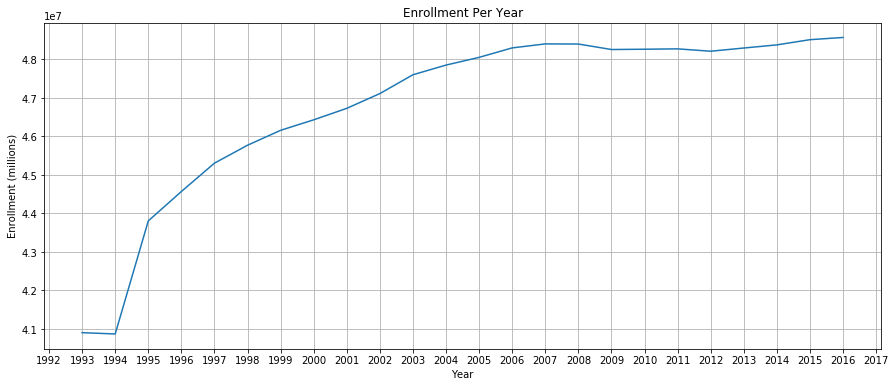

In [3]:
plt.figure(figsize = (15,6))
plt.grid()

plot = sns.lineplot(x="YEAR", y="enroll", data = rev_enroll_df)
plot.xaxis.set_major_locator(ticker.MultipleLocator(1))
plot.xaxis.set_major_formatter(ticker.ScalarFormatter())

plot.set_title("Enrollment Per Year")
plot.set_xlabel("Year")
plot.set_ylabel("Enrollment (millions)")


plt.savefig("graph_image/rev_enroll")
plt.show()

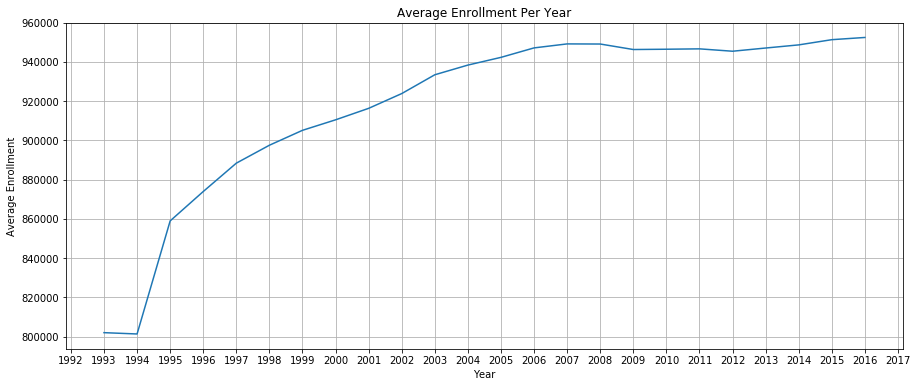

In [5]:
plt.figure(figsize = (15,6))
plt.grid()

plot = sns.lineplot(x='YEAR', y="average enroll", data = rev_enroll_df)
plot.xaxis.set_major_locator(ticker.MultipleLocator(1))
plot.xaxis.set_major_formatter(ticker.ScalarFormatter())

plot.set_title("Average Enrollment Per Year")
plot.set_xlabel("Year")
plot.set_ylabel("Average Enrollment")


plt.savefig("graph_image/rev_avg_enroll")
plt.show()

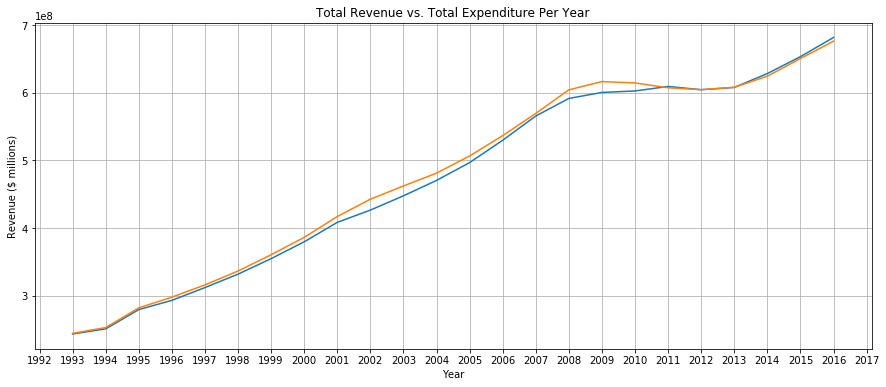

In [4]:
plt.figure(figsize = (15,6))
plt.grid()

plot = sns.lineplot(x='YEAR', y="total revenue", data = rev_enroll_df)
plot = sns.lineplot(x='YEAR', y="total expenditure", data = rev_enroll_df)
plot.xaxis.set_major_locator(ticker.MultipleLocator(1))
plot.xaxis.set_major_formatter(ticker.ScalarFormatter())

plot.set_title("Total Revenue vs. Total Expenditure Per Year")
plot.set_xlabel("Year")
plot.set_ylabel("Revenue ($ millions)")

plt.savefig("graph_image/rev_expend")
plt.show()

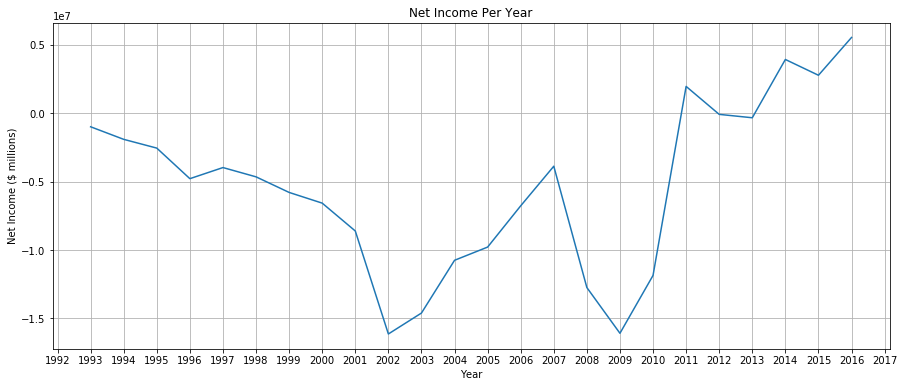

In [26]:
plt.figure(figsize = (15,6))
plt.grid()

plot = sns.lineplot(x='YEAR', y="net income", data = rev_enroll_df)
plot.xaxis.set_major_locator(ticker.MultipleLocator(1))
plot.xaxis.set_major_formatter(ticker.ScalarFormatter())

plot.set_title("Net Income Per Year")
plot.set_xlabel("Year")
plot.set_ylabel("Net Income ($ millions)")

plt.savefig("graph_image/netrev_enroll")
plt.show()



In [24]:
#George W. Bush served 2001 - 2009
#Barak Obama served 2009 - 2017